# 06 - Plotting

This notebook contains solution proposals to the home exercises.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot') # Set default style for plots

### 📚 Exercise 1: Fuel economy

Use the data in <code>mpg.xlsx</code> and explore the data visually.

Create a single figure with 4 subplots side-by-side (1x4 plot):

- In the first subplot, show a histogram of <code>mpg</code> with x bins.
- In the second subplot, show a bar plot with the number of cars for the different values in <code>origin</code>
- In the third subplot, show a scatter plot between <code>mpg</code> and <code>weight</code>
- In the fourth subplot, show a scatter plot between <code>mpg</code> and <code>acceleration</code>

Style the subplots to make them look nice and save the figure as `mpg_plot.png`.

In [2]:
# Import data
mpg_df = pd.read_excel('data/mpg.xlsx')

mpg_df.head()

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,140.0,3449,10.5,70,usa,ford torino


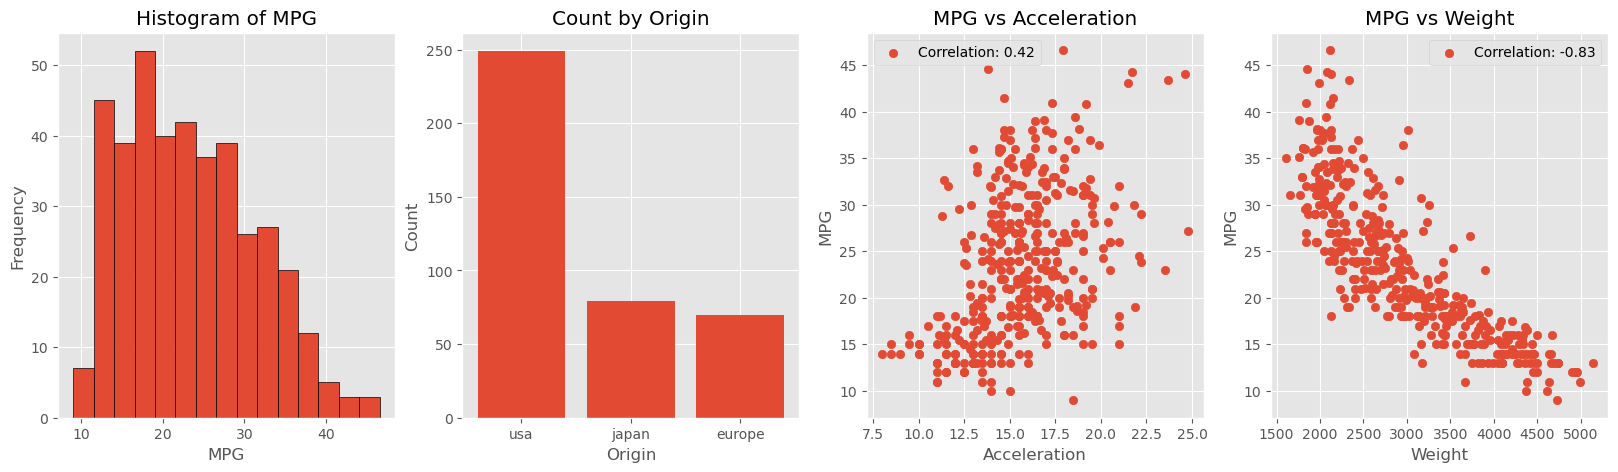

In [3]:
# Create a 1x4 subplot layout
fig, axes = plt.subplots(1, 4, figsize = (20, 5))

# 1. Histogram of mpg
axes[0].hist(mpg_df['mpg'], bins = 15, edgecolor = 'black')
axes[0].set_title('Histogram of MPG')
axes[0].set_xlabel('MPG')
axes[0].set_ylabel('Frequency')

# 2. Bar plot of origin counts
origin_counts = mpg_df['origin'].value_counts()
axes[1].bar(origin_counts.index, origin_counts.values)
axes[1].set_title('Count by Origin')
axes[1].set_xlabel('Origin')
axes[1].set_ylabel('Count')

# 3. Scatter plot: mpg vs acceleration
axes[2].scatter(mpg_df['acceleration'], mpg_df['mpg'], label = f'Correlation: {mpg_df['mpg'].corr(mpg_df['acceleration']):.2f}')
axes[2].set_title('MPG vs Acceleration')
axes[2].set_xlabel('Acceleration')
axes[2].set_ylabel('MPG')
axes[2].legend()

# 4. Scatter plot: mpg vs weight
axes[3].scatter(mpg_df['weight'], mpg_df['mpg'], label = f'Correlation: {mpg_df['mpg'].corr(mpg_df['weight']):.2f}')
axes[3].set_title('MPG vs Weight')
axes[3].set_xlabel('Weight')
axes[3].set_ylabel('MPG')
axes[3].legend()

plt.savefig('plots/mpg_plot.png', dpi = 500, bbox_inches = 'tight')

### 📚 Exercise 2: Apple closing price

Use `apple.csv` to visualize the daily closing price of Apple during 2020, and the average price before and after July 1st.

Import the data and:
- Plot a line chart showing the daily closing price across the year.
- Compute the average closing price:
    - before July 1, 2020
    - on and after July 1, 2020
- Add horizontal dashed lines to show these averages (use different colors for before/after).
- Add a vertical line at July 1, 2020 to indicate the cutoff date.
- Make the plot look nice with a title, axis labels, and a legend.
- Save the figure as `apple_plot.png`

*Hint*: Use `hlines` (instead of `axhline`) to add a horizontal line for a section of the values on the $x$-axis. Note also that you can use the pandas function `Timestamp` (instead of `to_datetime`) to convert a specific date (e.g., '2020-07-01') to a timestamp.

In [4]:
# Import data
apple = pd.read_csv('data/aapl.csv')
apple['Date'] = pd.to_datetime(apple['Date'])
apple.sort_values('Date', inplace = True)

apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,74.333511,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,73.610840,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,74.197395,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.848442,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,75.036385,132079200


In [5]:
# Define cutoff date
cutoff = pd.Timestamp('2020-07-01') # note: can also use pd.to_datetime
before = apple[apple['Date'] < cutoff]
after = apple[apple['Date'] >= cutoff]

# Compute averages
mean_before = before['Close'].mean()
mean_after = after['Close'].mean()

print(f'Average price before July 1: ${mean_before:.1f}')
print(f'Average price after July 1: ${mean_after:.1f}')

Average price before July 1: $75.5
Average price after July 1: $114.6


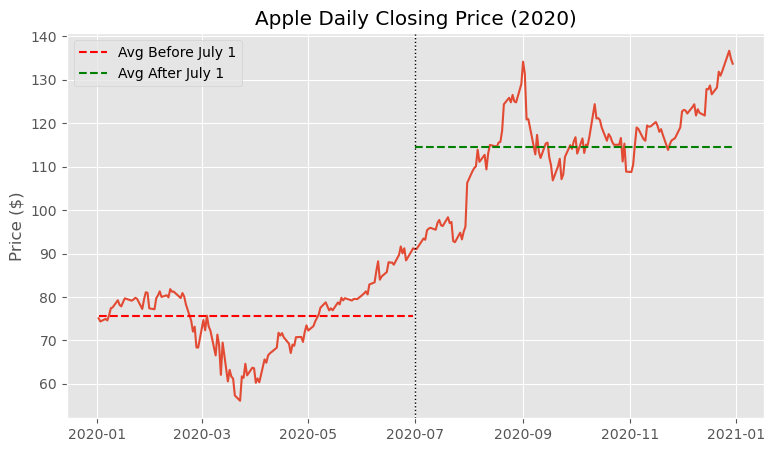

In [6]:
fig, ax = plt.subplots(figsize = (9, 5))

# Plot the line chart
ax.plot(apple['Date'], apple['Close'])

# Vertical cutoff line
ax.axvline(x = cutoff, color = 'black', lw = 1, ls = ':')

# Horizontal average lines
ax.hlines(y = mean_before, xmin = before['Date'].min(), xmax = before['Date'].max(), color = 'red', ls = '--', label = 'Avg Before July 1')
ax.hlines(y = mean_after, xmin = after['Date'].min(), xmax = after['Date'].max(), color = 'green', ls = '--', label = 'Avg After July 1')

# Formatting
ax.set_title('Apple Daily Closing Price (2020)')
ax.set_ylabel('Price ($)')
ax.legend()

plt.savefig('plots/apple_plot.png', dpi = 500, bbox_inches = 'tight')

### 📚 Exercise 3: Functions in data visualization

The file `closing_prices.csv` contains the daily closing price for 10 different tickers in 2020. The file has a column called `Stock` that indicates which ticker (e.g., 'AAPL', 'WMT', 'GOOG') the observations on the daily closing price (column `Close`) belongs to.

Import the file, and write a function called `plot_ticker(ticker, df)` that: 
- Takes the DataFrame (`df`) and a string (`ticker`) as input.
- Checks whether the given `ticker` is present in the data.
- If the ticker is not found, print:
    - `Ticker <TICKER> not found in dataset`
- If the ticker is found:
    - Plot a line chart of the closing price for that ticker over time.
    - Format the plot by e.g., adding a title, axis labels, legend etc.

Test the function with the following function calls:
- `plot_ticker('AAPL', df)`
- `plot_ticker('WMT', df)`
- `plot_ticker('FAKE', df)`

In the first two function calls, the output should be a line plot of the daily closing price; whereas the last function call should display the print statement instead.

In [7]:
# Import data
df_close = pd.read_csv('data/closing_prices.csv')
df_close['Date'] = pd.to_datetime(df_close['Date'])

print('Tickers:', df_close['Stock'].unique())
df_close.head()

Tickers: ['AAPL' 'AMZN' 'BABA' 'FB' 'GOOG' 'JNJ' 'JPM' 'MSFT' 'TSLA' 'WMT']


,Date,Close,Stock
0,2020-01-02,75.087502,AAPL
1,2020-01-03,74.357498,AAPL
2,2020-01-06,74.949997,AAPL
3,2020-01-07,74.597504,AAPL
4,2020-01-08,75.797501,AAPL


In [8]:
def plot_ticker(ticker, df = df_close):

    # Return print statement if ticker not in data
    if ticker not in df['Stock'].unique():
        print(f"Ticker '{ticker}' not found in dataset")

    else:
        # Extract observations for ticker
        subset = df[df['Stock'] == ticker].sort_values('Date').set_index('Date')
        
        fig, ax = plt.subplots(figsize = (8, 4))
    
        # Line chart of daily closing price
        ax.plot(subset['Close'], label = ticker)
    
        # Formatting
        ax.set_title('Daily closing price, 2020')
        ax.set_ylabel('Price ($)')
        ax.legend()
        
        plt.show()

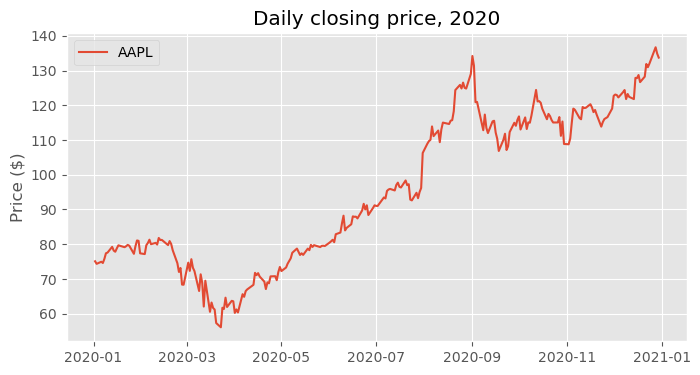

In [9]:
plot_ticker('AAPL')

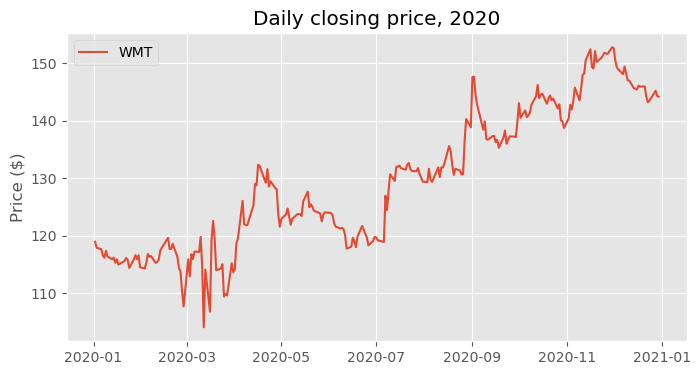

In [10]:
plot_ticker('WMT')

In [11]:
plot_ticker('FAKE')

Ticker 'FAKE' not found in dataset


### 📚 Exercise 4: For loops in data visualization

Use the data in `closing_prices.csv` to create a series of line charts of the daily closing price for different tickers. Note that the goal of this exercise is to use `for` loops to avoid code duplication.

Import the file, and generate the following plots:

**a)** A single graph that shows the daily closing prices of all of the stocks in the dataset except Google (GOOG) and Amazon (AMZN). Remember to add a legend to identify the different stocks.

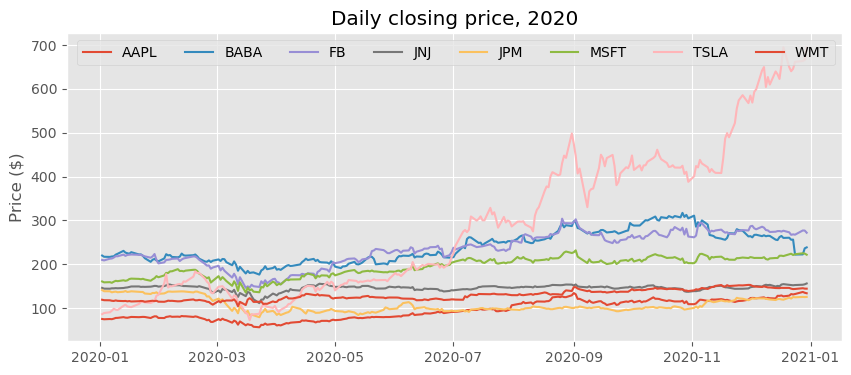

In [12]:
fig, ax = plt.subplots(figsize = (10, 4))

# Line charts for all tickers except GOOG and AMZN
for ticker in df_close['Stock'].unique():
    if ticker not in ('AMZN', 'GOOG'):
        subset = df_close[df_close['Stock'] == ticker].sort_values('Date').set_index('Date')
        ax.plot(subset['Close'], label = ticker)

# Format figure
ax.set_title('Daily closing price, 2020')
ax.set_ylabel('Price ($)')
ax.legend(ncols = 8)

plt.show()

**b)** A figure with four subplots side-by-side (i.e., 1 x 4 subplot) with each subplot showing the closing price for one of the following four tickers: 'AAPL', 'BABA', 'TSLA' and 'FB'

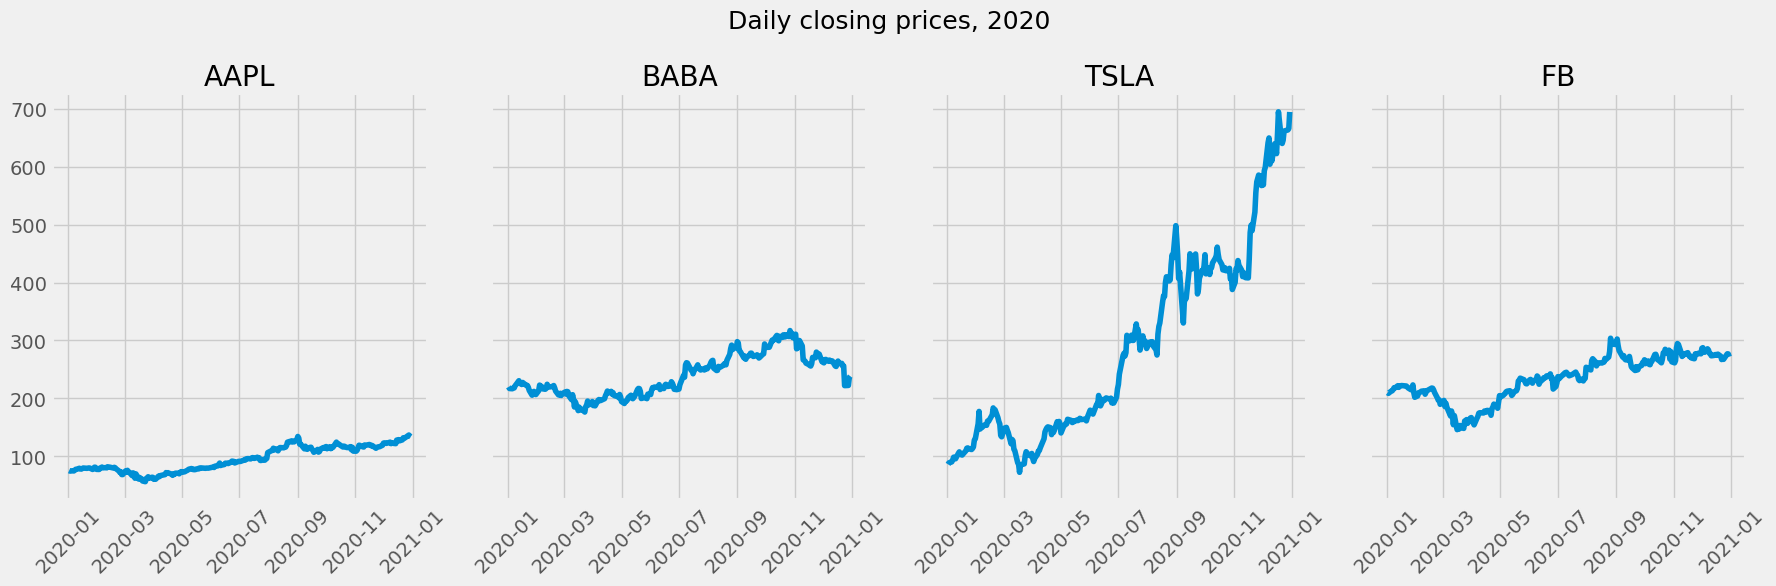

In [13]:
tickers = ['AAPL', 'BABA', 'TSLA', 'FB']

with plt.style.context('fivethirtyeight'): # Use different style sheet than default

    fig, axes = plt.subplots(
        nrows = 1, 
        ncols = 4, 
        sharey = True, # Set equal to True if we want all subplots to share scale on y-axis
        figsize = (18, 6)
    )
    
    for i in range(4):
    
        # Extract closing price for stock at index i
        subset = df_close[df_close['Stock'] == tickers[i]].sort_values('Date').set_index('Date')
    
        # Line chart for a ticker and ax object
        axes[i].plot(subset['Close'])
        axes[i].set_title(tickers[i])
        
        # Rotate the labels on x-axis in subplot i
        axes[i].tick_params(axis = 'x', labelrotation = 45)
    
    # Add title to figure
    fig.suptitle('Daily closing prices, 2020', fontsize = 18)
    plt.tight_layout() # (this makes the figure title look better)
    
    plt.show()

**c)** A figure with the same four tickers as above, but now the figure is a 2 x 2 subplot, i.e. two rows and two columns. 

Note that the `ax` object is normally a 2-dimensional object in a 2 x 2 subplot. However, we can apply the `ravel` function on the `ax` object to "flatten" it to a one-dimensional object so that we can loop over it the same way as in the previous task.

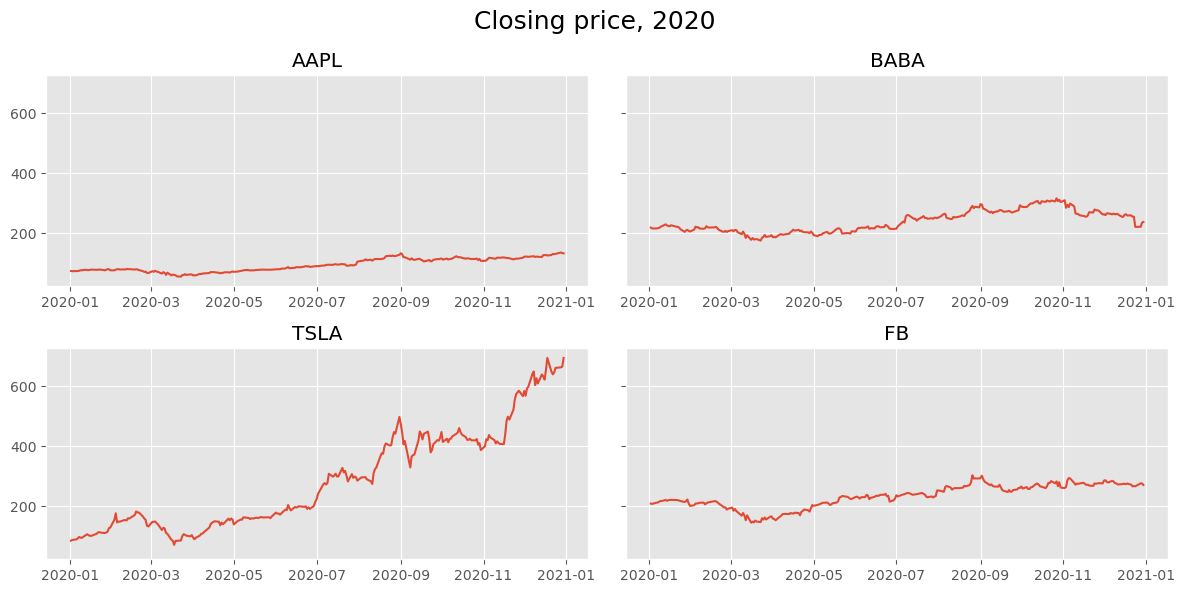

In [14]:
tickers = ['AAPL', 'BABA', 'TSLA', 'FB']

fig, axes = plt.subplots(
    nrows = 2, 
    ncols = 2, 
    sharey = True, # Set equal to True if we want all subplots to share scale on y-axis
    figsize = (12, 6)
)

# "Flatten" axes objects into a list
faxes = axes.ravel()

for i in range(len(faxes)):
    
    # Extract closing price for stock at index i
    subset = df_close[df_close['Stock'] == tickers[i]].sort_values('Date').set_index('Date')

    # Line chart for a ticker and ax object
    faxes[i].plot(subset['Close'])
    faxes[i].set_title(tickers[i])
    #faxes[i].tick_params(axis = 'x', labelrotation = 45)

# Add title to figure
fig.suptitle('Closing price, 2020', fontsize = 18)

plt.tight_layout() # Use this command to automatically adjust the space between subplots

plt.show()

Alternatively, we can use a nested `for` loop to iterate over the 2-dimensional `axes` object. However, in that case, we have to index the list of tickers with `i*2+j` to get the correct index in each iteration of the inner for loop.

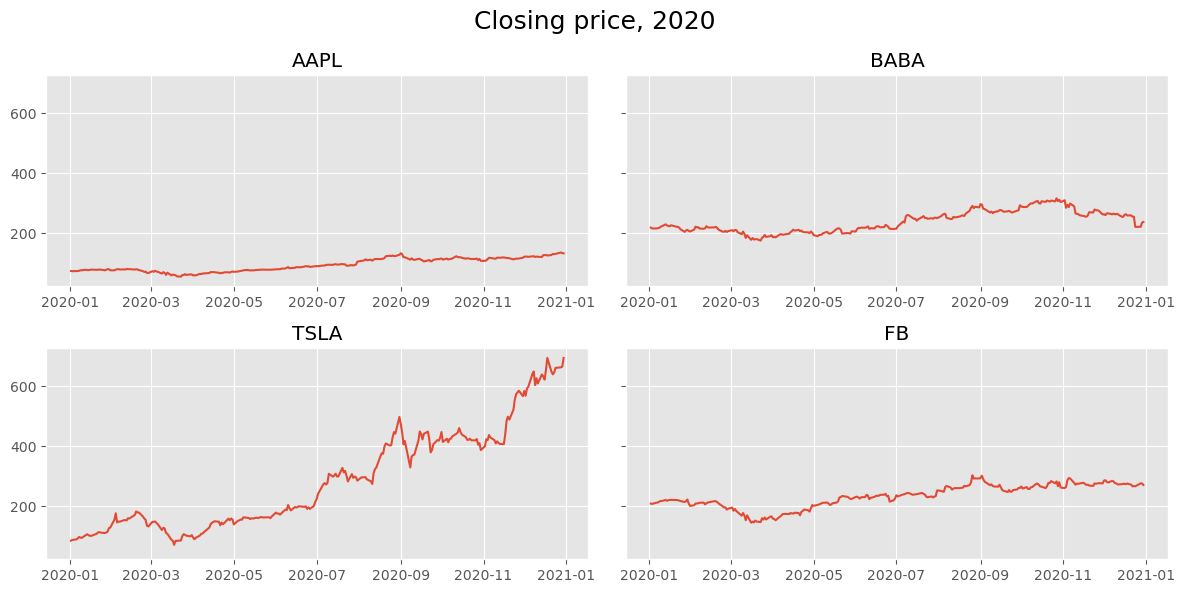

In [15]:
tickers = ['AAPL', 'BABA', 'TSLA', 'FB']

fig, axes = plt.subplots(
    nrows = 2, 
    ncols = 2, 
    sharey = True, # Set equal to True if we want all subplots to share scale on y-axis
    figsize = (12, 6)
)

for i in range(2):
    for j in range(2):

        # Extract closing price for stock at index i
        subset = df_close[df_close['Stock'] == tickers[i*2+j]].sort_values('Date').set_index('Date')
        
        # Line chart for a ticker and ax object
        axes[i, j].plot(subset['Close'])
        axes[i, j].set_title(tickers[i*2+j])
        #axes[i, j].tick_params(axis = 'x', labelrotation = 45)
        
# Add title to figure
fig.suptitle('Closing price, 2020', fontsize = 18)

plt.tight_layout() # Use this command to automatically adjust the space between subplots

plt.show()